# UBC CTLT Learning Analytics Hackathon 3.0 

## March 10, 2018 

### Import Data 

We'll be using the Open University Learning Analytics Dataset. 

1. Download data from https://analyse.kmi.open.ac.uk/open_dataset
2. Unzip data 
3. Open Jupyter notebook (from the same directory as dataset directory
4. Try code below 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
courses = pd.read_csv('courses.csv')

In [3]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [4]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
code_module                   22 non-null object
code_presentation             22 non-null object
module_presentation_length    22 non-null int64
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


#### Observing students and their number of clicks

In [5]:
studentvle = pd.read_csv('studentVle.csv')

In [6]:
studentvle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
code_module          object
code_presentation    object
id_student           int64
id_site              int64
date                 int64
sum_click            int64
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [7]:
studentvle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


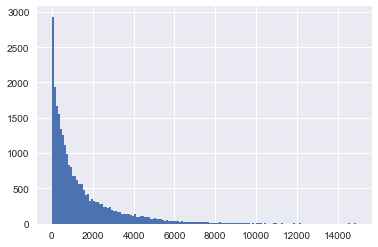

In [8]:
studentvle.groupby('id_student')['sum_click'].sum().hist(bins=range(0,15000,100))

In [9]:
studentinfo = pd.read_csv('studentinfo.csv')

In [10]:
studentinfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


#### Finding the number of unique students

In [11]:
studentinfo['id_student'].nunique()

28785

#### Number of students in each course

In [12]:
studentregistration = pd.read_csv('studentregistration.csv')

In [13]:
studentregistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
code_module            32593 non-null object
code_presentation      32593 non-null object
id_student             32593 non-null int64
date_registration      32548 non-null float64
date_unregistration    10072 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [14]:
course_size = studentregistration.groupby(['code_module','code_presentation'])['id_student'].nunique().unstack().fillna(0)

In [15]:
course_size

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,0.0,383.0,0.0,365.0
BBB,1767.0,2237.0,1613.0,2292.0
CCC,0.0,0.0,1936.0,2498.0
DDD,1303.0,1938.0,1228.0,1803.0
EEE,0.0,1052.0,694.0,1188.0
FFF,1614.0,2283.0,1500.0,2365.0
GGG,0.0,952.0,833.0,749.0


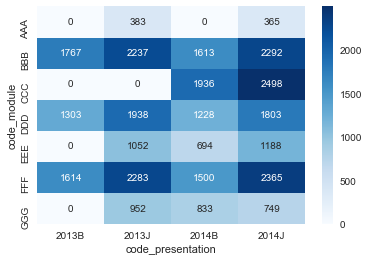

In [16]:
sns.heatmap(course_size,cmap='Blues',annot=True,fmt= '.0f')

#### Correlation between activity and final grade 

In [5]:
studentassessment = pd.read_csv('assessments.csv')

In [6]:
allstudents = pd.read_csv('all_enrolments.csv')

In [19]:
allstudents.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_activity,days_active,last_active_date,distinct_content_items_accessed,final_assessment_score,final_exam_score
0,AAA,2013J,11391,-159.0,NaN,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0,40.0,253.0,55.0,82.4,NaN
1,AAA,2013J,28400,-53.0,NaN,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0,80.0,239.0,84.0,65.4,NaN
2,AAA,2013J,30268,-92.0,12.0,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0,12.0,12.0,22.0,NaN,NaN
3,AAA,2013J,31604,-52.0,NaN,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0,123.0,264.0,82.0,76.3,NaN
4,AAA,2013J,32885,-176.0,NaN,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0,70.0,247.0,66.0,55.0,NaN


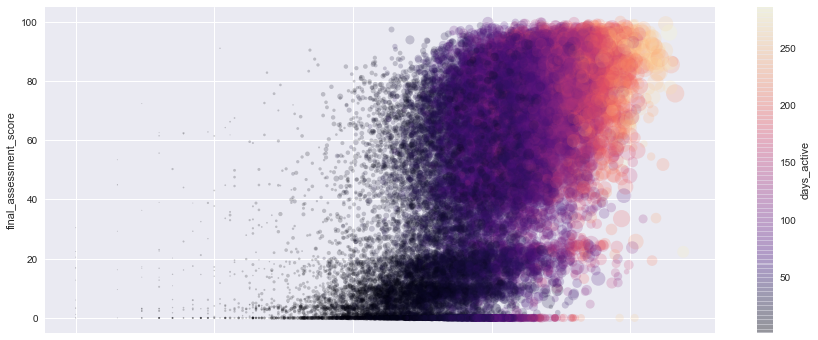

In [20]:
allstudents['distinct_content_items_accessed'].fillna(0)
allstudents.plot(kind='scatter', x = 'total_activity', y = 'final_assessment_score', 
                 c = 'days_active', cmap = 'magma', s = allstudents['distinct_content_items_accessed'],
                 alpha = 0.2, lw=0, figsize=(15,6), logx = True)

In [83]:
allstudents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 20 columns):
code_module                        32593 non-null object
code_presentation                  32593 non-null object
id_student                         32593 non-null int64
date_registration                  32548 non-null float64
date_unregistration                10072 non-null float64
gender                             32593 non-null object
region                             32593 non-null object
highest_education                  32593 non-null object
imd_band                           31482 non-null object
age_band                           32593 non-null object
num_of_prev_attempts               32593 non-null int64
studied_credits                    32593 non-null int64
disability                         32593 non-null object
final_result                       32593 non-null object
total_activity                     29228 non-null float64
days_active                        2

#### Who clicked on what and when over the course of a course? 

In [21]:
studentvle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
code_module          object
code_presentation    object
id_student           int64
id_site              int64
date                 int64
sum_click            int64
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [23]:
CCC = studentvle[(studentvle['code_module'] == 'CCC')]

In [24]:
CCC_2014J = CCC[CCC['code_presentation'] == '2014J']

In [26]:
clicks = CCC_2014J.groupby(['id_site','date'])['sum_click'].sum().unstack().fillna(0)

In [27]:
clicks.head()

date,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,...,260,261,262,263,264,265,266,267,268,269
id_site,,,,,,,,,,,,,,,,,,,,,
909013,4808.0,2226.0,1786.0,1318.0,1157.0,1160.0,1234.0,1728.0,1492.0,1420.0,...,154.0,304.0,288.0,220.0,247.0,238.0,145.0,189.0,281.0,240.0
909014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
909015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
909016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0
909018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.0,192.0,147.0,121.0,144.0,181.0,135.0,68.0,134.0,82.0


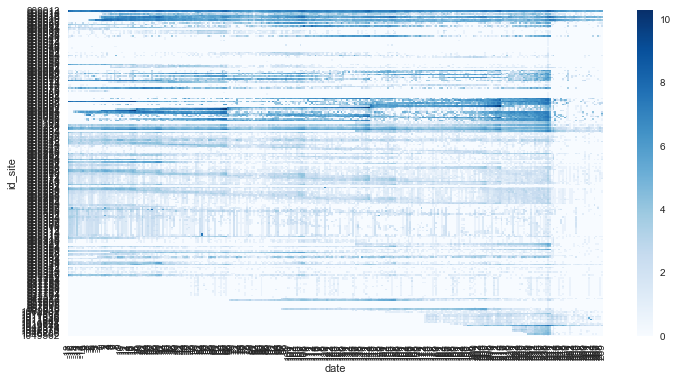

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(np.log(1+clicks),cmap = 'Blues')

In [36]:
GGG = allstudents[allstudents['code_module'] == 'GGG']
GGG.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_activity,days_active,last_active_date,distinct_content_items_accessed,final_assessment_score,final_exam_score
30059,GGG,2013J,24391,-64.0,NaN,M,East Midlands Region,A Level or Equivalent,80-90%,0-35,0,30,N,Distinction,712.0,58.0,249.0,45.0,0.0,NaN
30060,GGG,2013J,26023,-37.0,NaN,M,North Western Region,Lower Than A Level,10-20,35-55,0,30,N,Pass,786.0,84.0,253.0,43.0,0.0,NaN
30061,GGG,2013J,32239,-78.0,NaN,F,London Region,A Level or Equivalent,30-40%,0-35,0,30,N,Pass,620.0,51.0,237.0,45.0,0.0,NaN
30062,GGG,2013J,35001,-27.0,NaN,F,East Midlands Region,Lower Than A Level,70-80%,35-55,0,30,N,Fail,77.0,14.0,101.0,14.0,0.0,NaN
30063,GGG,2013J,60405,-123.0,NaN,F,Yorkshire Region,A Level or Equivalent,10-20,35-55,0,30,N,Distinction,852.0,54.0,258.0,47.0,0.0,NaN


## Final Assessment Scores 

Let's look at final assessment score per course offering 

In [8]:
all_enrolments = pd.read_csv('all_enrolments.csv')

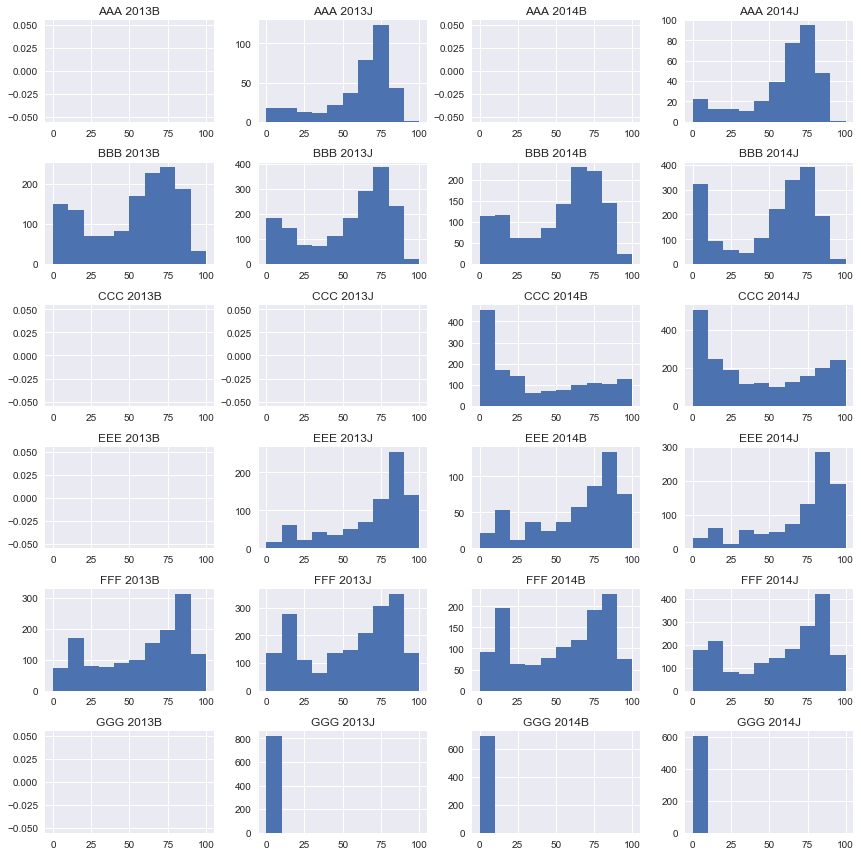

In [9]:
courses = ['AAA','BBB','CCC','EEE','FFF','GGG']
presentations = ['2013B','2013J','2014B','2014J']
num_courses = len(courses)
num_presentations = len(presentations)
plt.figure(figsize=(12,12))
plt.subplot(num_courses,num_presentations,1)
for i, course in enumerate(courses):
    for j, presentation in enumerate(presentations):
        plt.subplot(num_courses,num_presentations,num_presentations*i + j + 1)
        course_df = all_enrolments[(all_enrolments['code_module'] == course) & (all_enrolments['code_presentation'] == presentation)]
        grades = course_df['final_assessment_score'].fillna(-1)
        plt.hist(grades,bins=range(0,101,10))
        plt.title(course + ' ' + presentation)
plt.tight_layout()